# <center><font color=	DarkRed>Projet - Challenge Smart city : "Végétalisons la ville"</font></center><br>

<center>
<img src="../image/1200px-Ville_de_Paris_logo_2019.svg.png", style="width:150px;height:120px;">
</center>
<br>

**<font color=DarkRed>La mission</font>** est de réaliser une analyse exploratoire pour **l'optimisation des tournées (reduire les trajet) pour l’entretien des arbres de la ville**. 

**<font color=DarkRed>L'environnement de développement</font>** a été installé via la distribution <code>**Anaconda**</code>, intégrant en natif :
- le langage de programmation <code>**Python**</code>, adapté pour l'analyse de données ,
- le <code>**Jupyter Notebook**</code>, qui permet de rassembler dans un même document du texte, des images et du code informatique exécutable et manipulable dans un navigateur web .<br>

J'ai créer un **environnement virtuel** dédié à ce projet dans <code>**Anaconda**</code> pour assurer l'isolement du projet et la gestion des dépendances.

**<font color=DarkRed>La méthodologie :</font>** Pour bien comprendre le jeu de données et effectuer une synthèse appropriée, je vais réaliser une **analyse de données exploratoire en utilisant les librairies Python**,à l'aide de **l'analyse statistique univariée**.

Cette analyse se découpera en **3 grandes partiee** :
- La **présentation générale** du jeu de données ;
- La **démarche méthodologique** d'analyse;
- Une **synthèse**.

Pour allez plus loin, je vais effectuer egalement une **analyse bivariée et multivariée**
<hr>

La première étape consiste en l'**importation des librairies <code>Python</code>** nécessaires à l'analyse dans le <code>**Jupyter Notebook**</code> : <br>
- <code>**NumPy**</code>, 
- <code>**Pandas**</code>, 
- <code>**Matplotlib**</code>, 
- <code>**Seaborn**</code>, 
- <code>**Missingno**</code>.

## Importation des librairies

In [1]:
# Importer les librairies utiles 
import pandas as pd # pour importer les données sous formes de dataframe
import numpy as np
from scipy.stats import chi2_contingency

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # pour afficher les données manquantes
import folium


#Utilisationde la méthode "setOption()"
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

dim_fig = (10,5)

## Declaration des fonctions

In [2]:
# Résumé des données par colonne avec une fonction spécifique
def resume_col_data(df):
    '''
    * Nom : resume_col_data.
    * Paramètres : df
    * Utilisation : resume_col_data(df)
    * Warnings :
    * Résumé : Fonction permettant d'analyser les valeurs manquante d'un dataset
  
               Paramètre à donner en entrée de la fonction :
                - df: Dataframe d'entrée.
               
               Paramètre de sortie:
               Retourne un dataFrame
               
    * Packages nécessaires : 
                - Aucun
    '''
    # Valeurs calculées pour chaque colonne
    val_unique = df.nunique(dropna=False) # Nb Valeurs uniques, y compris les valeurs manquantes
    val_non_nulle = df.count(axis=0) # Nb de valeurs Non-nulles
    val_manq = df.isnull().sum() # Nb de valeurs manquantes
    val_manq_pourcent = 100 * df.isnull().sum() / len(df) # % de valeurs manquantes
    val_zero = (df == 0.00).astype(int).sum(axis=0) # Nb de valeurs à zéro
    val_zero_pourcent = 100 *((df == 0.00).astype(int).sum(axis=0)) / len(df)
    # Création d'une table de donnée ayant pour colonne les valeurs calculées
    ts_table = pd.concat([val_unique, val_non_nulle, val_manq, val_manq_pourcent, val_zero, \
                              val_zero_pourcent], axis=1)
    # Libellés explicites pour chaque colonne
    ts_table = ts_table.rename(
    columns = {0 : "Valeurs uniques", 1 : "Valeurs non-nulles", 2 : "Valeurs manquantes", \
                   3 : "% Valeurs manquantes", 4 : "Valeurs à zéro", 5 : "% Zéro"})
    # Ajout de la colonne de type de données à la table de données
    ts_table['Type Données'] = df.dtypes
    # Création d'un filtre sur les valeurs manquantes
    filtre_vm = ts_table[ts_table["Valeurs manquantes"] != 0]
    # Tri décroissant sur la colonne "Valeurs manquantes"
    ts_table = ts_table[
            ts_table.iloc[:,0] != 0].sort_values("% Valeurs manquantes", ascending=False).round(1)
    # Afficher le nombre de colonnes et de lignes au total et le nombre de colonnes avec vlr manquantes
    print("Le DataFrame a",'\033[1m' + str(df.shape[1]),"colonnes" + '\033[0m', "et",'\033[1m' +str(df.shape[0]),"lignes"+ '\033[0m',"(y compris les en-têtes).\n"    
            "Il y a " + '\033[1m' + str(filtre_vm.shape[0]) + " colonnes" + '\033[0m', "ayant des valeurs manquantes.")
    print('\033[1m' + "Les types de données :\n" + '\033[0m',df.dtypes.value_counts())

    return ts_table

def synthese_data(df, name_df):
    '''
    * Nom : synthese_data.
    * Paramètres : df, name_df
    * Utilisation : synthese_data(df, name_df)
    * Warnings :
    * Résumé : Fonction permettant d'afficher les indicateurs d'un dataframe
  
               Paramètre à donner en entrée de la fonction :
                - df: Dataframe(avec les colonnes selectionné pour l'analyse).
                - name_df: Dataframe.
                
               Paramètre de sortie:
               Retourne un dataFrame avec les indicateurs des colonnes selectionné
               
    * Packages nécessaires : 
                - Aucun
    '''
    liste = []
    for col in df.columns:
        print(f'\n \
    ================================================\n \
    >    {col}\n \
    ------------------------------------------------')
        resume = name_df[col]
        comptage = resume.value_counts()
        pourcent100 = resume.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        print(pd.DataFrame({'Compte': comptage, 'par100': pourcent100}))
        

def test_chi2(data_categorical):
    '''
    * Nom : test_chi2.
    * Paramètres : data_categorical
    * Utilisation : test_chi2(data_categorical)
    * Warnings :
    * Résumé : Fonction qui retourne un dataframe avec les valeurs du chi2 et du V_cramer
  
               Paramètre à donner en entrée de la fonction :
                - data_categorical: Dataframe contenant les variables qualitative.
                
               Paramètre de sortie:
               Retourne un dataFrame avec les valeurs du chi2 et du V_cramer
               
    * Packages nécessaires : 
                - scipy.stats
    '''
    liste_chi2 = []
    lst_chi2 = []
    for cols1 in data_categorical.columns:
        for cols2 in data_categorical.columns:
            if cols1 != cols2 and "{} {}".format(cols2, cols1) not in liste_chi2:
                liste_chi2.append("{} {}".format(cols1, cols2))
                contingence = pd.crosstab(data_categorical[cols1], data_categorical[cols2])
                chi2, p_values, dof, ex = chi2_contingency(contingence)
                chi2 = chi2_contingency(contingence)[0]
                n = sum(contingence.sum())
                if n*(min(contingence.shape)-1) > 0.0:
                    cramer = np.sqrt(chi2 / (n*(min(contingence.shape)-1)))*100
                else :
                    cramer = 0
                if p_values <= 0.05:
                    lst_chi2.append(["{}".format(cols1),"{}".format(cols2), "%.5f" % p_values, "%.2f" % cramer])
            df_chi2 = pd.DataFrame(lst_chi2, columns=["Num_var1","Num_var2","pvalues_chi2","V_cramer"])
            df_chi2 = df_chi2.sort_values(by='V_cramer', ascending = False)
    return df_chi2

# Création d'une fonction qui remplace les libelles "rares" par "Autres"
def replace_rare_labels(df, col, threshold, new_col):
    '''
    * Nom : replace_rare_labels.
    * Paramètres : df, column, new_col
    * Utilisation : replace_rare_labels(df, column, new_col)
    * Warnings :
    * Résumé : Fonction qui remplace les valeurs inférieur à un seuil par la valeur "Autres"
  
               Paramètre à donner en entrée de la fonction :
                - df: Dataframe.
                - col : colonne à traiter
                - threshold : valeur de seuil 
                - new_col : colonne de sortie
                
               Paramètre de sortie:
               Retourne un dataFrame avec la colonne dont les valeurs ont été modifier par la valeur "Autres"
               
    * Packages nécessaires : 
                
    '''
    """
    Replace rare labels in a column of a dataframe with "Other"
    :param df: dataframe
    :param column: column to be processed
    :param threshold: minimum number of occurrences of a label to be kept
    :return: dataframe with replaced labels
    """
    # Compter le nombre d'occurrences de chaque étiquette
    counts = df[col].value_counts()

   
    # Remplacer les étiquettes en fonction du seuil par 'Autre'
    df[new_col] = df[col].apply(lambda x: 'Autres' if counts[x] < counts.sort_values(ascending=False)[threshold] else x)

    return df

# Fonction graphique

# diagramme circulaire
def graph_pie(data, title, dim_fig):
    # Représentation graphique
    plt.figure(figsize=dim_fig)
    data.value_counts().plot.pie(autopct="%1.0f%%")
    plt.title(title, fontsize=12)
    plt.ylabel("")
    return plt.show()
    
# graphique à bar horizontal 
def graph_barh(data, title, ylabel, xlabel, dim_fig, color):
    plt.figure(figsize=dim_fig)
    data.value_counts().sort_values().plot.barh(width=0.8, color=color)
    plt.title(title, fontsize=15)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    return plt.show()
    
#graphique à bar vertical 
def graph_bar(data, title=None, ylabel=None, xlabel=None, dim_fig=None, color=None):
    plt.figure(figsize=dim_fig)
    data.value_counts().plot.bar(width=0.7, color=color)
    plt.title(title, fontsize=15)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    return plt.show()

# carte thermique
def heatmap(data1, data2, dim_fig):
    plt.rcdefaults()
    plt.subplots(figsize=(20,10))
    sns.heatmap(pd.crosstab(data1,data2), annot=True, linecolor ='Black', linewidths=2, fmt=".2f")
    return plt.show()




## <center><font color=darkRed>1. - Présentation générale du jeu de données</font></center>

Le **jeu de données** portant sur le patrimoine arboré de la ville de Paris est disponible à ce lien : <a>[opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/information/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable)</a>.

Dans cette 1ère partie, je vais **établir le profil** du jeu de données : c'est un processus qui aide à avoir un **aperçu** des données à notre disposition.

J'utilise la librairie <code>**Pandas**</code> pour l'**importation** du fichier texte "**p2-arbres-fr.csv**" afin de le charger vers un <code>**DataFrame**</code>, que je vais appeler **<code><font color=DarkRed>df</font></code>**.  

*Un **DataFrame** est une structure de données ressemblant à un tableau en 2 dimensions, incluant des lignes (<code>axis=0</code>) et des colonnes (<code>axis=1</code>).*


In [3]:
data = "../data/p2-arbres-fr.csv"

In [4]:
df = pd.read_csv(data, sep=";",keep_default_na = 'true',low_memory=False)
#df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep =r'\t', engine='python')

In [5]:
#affichage des 5 premières lignes du dataframe à l'aide de la fonction .head()
#afin d'avoir un 1er aperçu du contenu du jeu de données et de vérifier si les données ont bien été chargées.
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


Pour chaque arbre listé, je dispose des informations suivantes
- `id` : simple identifiant de l'arbre (entier, ex. : `99874`)
- `type_emplacement` : type de l'emplacement (texte, ex. : `"Arbre"`)
- `domanialite` : type de lieu auquel appartient l'arbre (texte, ex. : `"Jardin"`)
- `arrondissement` : arrondissement de Paris où est situé l'arbre (texte, ex. : `"PARIS 7E ARRDT"`)
- `complement_addresse` : complement d'adress (texte, pas d'exemple visible)
- `numero` : numéro de l'adress (texte, pas d'exemple visible)
- `lieu` : adresse de l'arbre (texte, ex. : `"MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E"`)
- `id_emplacement` : identifiant de l'emplacement (texte, ex. : `"19"`)
- `libelle_francais` : nom commun (vernaculaire) de l'espèce de l'arbre (texte, ex. : `"Marronnier"`)
- `genre` : genre de l'arbre (texte, ex. : `"Aesculus"`)
- `espece` : espèce de l'arbre (texte, ex. : `"hippocastanum"`)
- `variete` : variété de l'arbre (texte, pas d'exemple visible)
- `circonference_cm` : circonférence en centimètres de l'arbre (entier, ex. : `20`)
- `hauteur_m` : taille en mètres de l'arbre (entier, ex. : `5`)
- `stade_developpement` : stade de développement de l'arbre (texte, ex. : `"A"` pour "Adulte")
- `remarquable` : si l'arbre est "remarquable" ou non (booléen, ex. : `0` pour un arbre "non remarquable")
- `geo_point_2d_a` : latitude de la position de l'arbre (nombre à virgule, ex. : `48.857620`)
- `geo_point_2d_b` : longitude de la position de l'arbre (nombre à virgule, ex. : `2.320962`)

**Analyse des premieres données :**
- certaine valeurs ne sont pas fournies (`NaN` = "Not a Number" = donnée non renseignée)
- je peux  classer les variables selon leur type :
    - **quantitatives**
        - discrètes : `id`, `circonference_cm`, `hauteur_m`
        - continues : `geo_point_2d_a`, `geo_point_2d_b`
    - **qualitatives**
        - nominales : `type_emplacement`, `domanialite`, `arrondissement`, `complement_addresse`, `numero`, `lieu`, `id_emplacement`, `libelle_francais`, `genre`, `espece`, `variete`
        - ordinales : `stade_developpement`, `remarquable`
        
- je peux classer les données en trois catégories :

    - données système : `id`, `id_emplacement`, `type_emplacement`
    - données de localisation : `arrondissement`, `complement_addresse`, `numero`, `lieu`, `geo_point_2d_a`, `geo_point_2d_b`
    - données de description : 
        - taille : `circonference_cm`, `hauteur_m` et `stade_developpement`
        - type : `libelle_francais`, `genre`, `espece` et `variete`
        - autre : `remarquable`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

### <center><font color=DarkBlue>1.1 - Description du jeu de données</font></center>

Pour décrire le jeu de données, j'utilise la méthode **.describe()**, qui <font color=DarkRed>**calcule et affiche des statistiques récapitulatives pour une trame de données**</font> 

Je souhaite afficher la description de tous les types de données de mon dataframe en incluant les données qualitatives, pour ce faire, j'indique en argument de la méthode <code>**include="all"**</code>

**les statistiques afficher pour tout les types de données sont les suivantes :**

- <font color=DarkRed>**les données numériques**</font> (`id`, `circonference_cm`, `hauteur_m`, `remarquable`, `geo_point_2d_a` et `geo_point_2d_b`) :

    - le nombre de valeurs non-vide (`count`)
    - la moyenne (`mean`)
    - l'écart-type (`std`), (mesure de la dispersion d'un ensemble de valeurs autour de la moyenne, Plus l'écart-type est faible, plus la population est homogène)
    - les valeurs minimale (`min`) et maximale (`max`)
    - les centiles : 
        - **25 %**: le 1er quartile (valeur au-dessus de laquelle se situent 75% des individus);
        - **50 %**: le 2nd quartile ou médiane (valeur au-dessus de laquelle se situent 50% des individus);
        - **75 %**: le 3e quartile (valeur au dessus de laquelle se situent 25% des individus) ;
        
**NOTE** : les quartiles sont les 3 valeurs qui partagent une distribution en quatre parties égales, ils font partie des quantiles.

- <font color=DarkRed>**les données textuelles**</font> (`type_emplacement`, `domanialite`, `arrondissement`, `complement_addresse`, `lieu`, `id_emplacement`, `libelle_francais`, `genre`, `espece`, `variete` et `stade_developpement`) :

    - le nombre de valeurs non-vide (`count`)
    - le nombre de valeurs différentes (`unique`)
    - la valeur la plus représentée (`top`)
    - la fréquence de la valeur la plus courante (`freq`)

In [7]:
print("Le DataFrame a",'\033[1m' + str(df.shape[1]),"colonnes" + '\033[0m', "et",'\033[1m' +str(df.shape[0]),"lignes"+ '\033[0m',"(y compris les en-têtes).\n") 

df.describe(include="all")

Le DataFrame a 18 colonnes et 200137 lignes (y compris les en-têtes).



,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137,200136,200137,30902,0.0,200137,200137,198640,200121,198385,36777,200137.000000,200137.000000,132932,137039.000000,200137.000000,200137.000000
unique,NaN,1,9,25,3795,NaN,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,NaN,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,3.872027e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876447,2.386838


**On peut déduire de nombreux points :**

- chaque arbre possède un <code>**id**</code> unique (cette variable n'apporte donc aucune information)
- il n'y a qu'une seule valeur possible pour la variable <code>type_emplacement</code> : <code>Arbre</code> (ce critère n'apporte donc pas d'information)
- les valeurs respectives de <code>complement_addresse</code> et <code>id_emplacement</code>  ont des valeurs très différentes (ces valeurs sont peu représentatives)
- la colonne <code>lieu</code> peut être découpée avec le séparateur `" / "` Par exemple, pour regrouper tous les lieux commençant par`"PARC FLORAL DE PARIS"`
- les données de <code>circonference_cm</code> et <code>hauteur_m</code> présentent des valeurs aberrantes :
    - `minimum = 0` , ce qui semble impossible
    - `circonference_cm` : `maximum = 250255` et `hauteur_m` : `maximum = 881818` , ce qui semble impossible

Concernant la <code>**domanialité**</code>, Les arbres d'alignement sont les plus présents à **52%**.  
Le <code>**genre**</code> **Plantanus** (Platane) est le plus présent.  
La <code>**circonférence**</code> moyenne des arbres est de **83cm**
la <code>**hauteur**</code> moyenne des arbres est de **13m**.  


Le <code>**stade_developpement**</code> est défini par quatre états :
- **A** = Adulte, 
- **J** = Jeune, 
- **M** = Mature, 
- **JA** = Jeune-Adulte.

**48%** des arbres sont au stade A de développement.

### <center><font color=DarkBlue>1.2 - Analyses des valeurs manquantes</font></center>

Pour analyser les valeurs manquantes, j'utilise la **fonction**, nommée <code>resume_col_data</code> definit dans le chapitre **definition des fonctions**, qui me permet de faire une <font color=DarkRed>**synthèse générale du jeu de données**</font> apportant :
- une <font color=DarkRed>**vue d'ensemble**</font> du dataset, 
- des <font color=DarkRed>**indicateurs**</font> portant sur toutes les colonnes.

**Les indicateurs sont les suivants :**

- le <font color=DarkRed>**nombre de colonne ayant des valeurs manquantes**</font> ;
- le comptage des <font color=DarkRed>**valeurs uniques**</font> par colonne (*y compris les valeurs manquantes*) ;
- le nombre de <font color=DarkRed>**valeurs non-nulles**</font> par colonne ;
- le <font color=DarkRed>**nombre et le pourcentage de valeurs manquantes**</font> par colonne ;
- le <font color=DarkRed>**nombre et le pourcentage de valeurs à zéro**</font> par colonne ;
- le <font color=DarkRed>**type de données**</font> pour chaque colonne.

In [8]:
# Appel de la fonction sur le DataFrame
resume_col_data(df)

Le DataFrame a 18 colonnes et 200137 lignes (y compris les en-têtes).
Il y a 9 colonnes ayant des valeurs manquantes.
Les types de données :
 object     11
float64     4
int64       3
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
numero,1,0,200137,100.0,0,0.0,float64
complement_addresse,3796,30902,169235,84.6,0,0.0,object
variete,437,36777,163360,81.6,0,0.0,object
stade_developpement,5,132932,67205,33.6,0,0.0,object
remarquable,3,137039,63098,31.5,136855,68.4,float64
espece,540,198385,1752,0.9,0,0.0,object
libelle_francais,193,198640,1497,0.7,0,0.0,object
genre,176,200121,16,0.0,0,0.0,object
domanialite,10,200136,1,0.0,0,0.0,object
circonference_cm,531,200137,0,0.0,25867,12.9,int64


<AxesSubplot:>

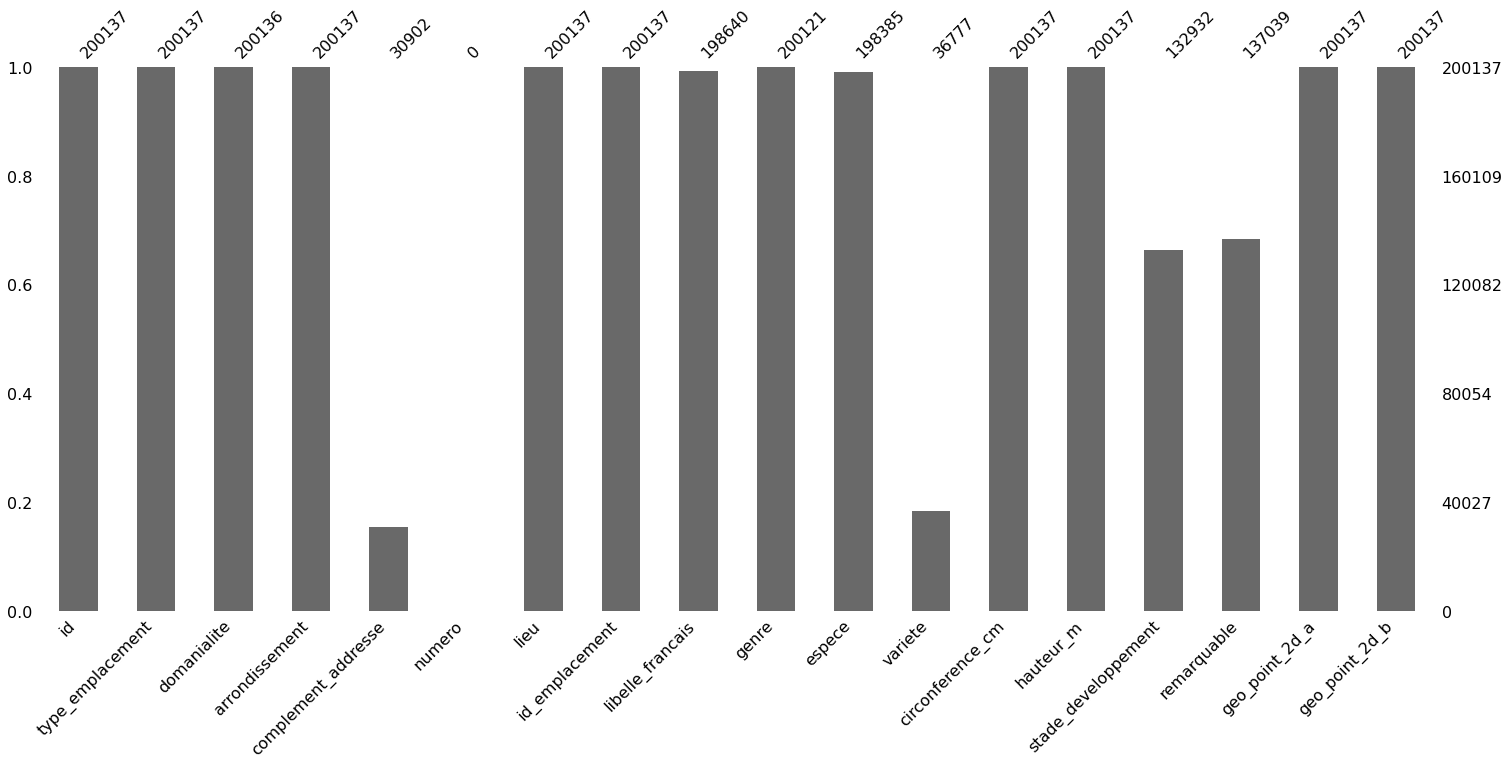

In [9]:
# Afficher le résultat à l'aide de la librairie missigno
msno.bar(df)

Le nombre de données manquantes calculé et affiché à l'aide de la librairie missigno permettent de comprendre dans quelles colonnes les informations sont complètes et dans quelles colonnes elles sont manquantes.  

**Analyse des colonnes contenant des NaN :**

- <code>**numero**</code>: est totalement vide, on peut supprimer cette colonne.  
- <code>**complement_adresse**</code>: 84.6% de valeurs manquantes.  
- <code>**variete**</code>: 81.6% de valeurs manquantes.  
- <code>**stade_developpement**</code>: 33.6% de valeurs manquantes, corrélation possible entre le type de l'arbre et sa circonférence / taille.  
- <code>**remarquable**</code>: 31.5% de valeurs manquantes. 
- <code>**espece**</code>: 0.9% de valeurs manquantes  
- <code>**libelle_francais**</code>: 0.8% de valeurs manquantes  
- <code>**genre**</code>: 0.008% de valeurs manquantes  

les colonnes <code>**complement_adresse**</code>, <code>**numero**</code> et <code>**variete**</code> présentent trop de données manquantes. De ce fait, ces trois colonnes seront exclues de l'analyse statistique.

les colonnes <code>**especes**</code>, <code>**libelle_francais**</code> et <code>**genre**</code> présente peu de valeurs manquantes. Elles peuvent être donc faciles à déterminer en utilisant d'autre colonnes. 

Au moins, **68%** des données sont présentes au niveau des autres colonnes.

<br>

**<center>Tableau de synthèse</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre de colonnes** | 18 |
| **Nombre de lignes** | 200.137 |
| **Nombre de variables qualitatives** | 11 |
| **Nombre de variables quantitatives** | 7 |
| **Données manquantes** | 32% de données manquantes |

<br>

### <center><font color=DarkBlue>1.3 Analyses des valeurs dupliquées</font></center>

In [10]:
df[df.id.duplicated()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b


Chaque ligne du jeu de données est unique, cela est tout à fait normal, car l'id est un élément unique permettant d'identifier un arbre dans le dataset.

À première vue, le jeu de données ne semble pas contenir des valeurs dupliquées. Or, plusieurs arbres peuvent être plantés au même point de géolocalisation. Il est nécessaire également de jeter un coup d'œil et vérifier s'il n'y a pas de données "dupliquées", cela peut être due soit à une erreur de saisie ou un remplacement de l'arbre.

In [11]:
duplicated = df[df.duplicated(['geo_point_2d_a','geo_point_2d_b'], keep=False)].sort_values(by="geo_point_2d_a")
drop_duplicated = duplicated.drop(['type_emplacement','arrondissement','complement_addresse','numero', 'lieu','variete'], axis=1)
print("Le DataFrame a",'\033[1m' +str(drop_duplicated.shape[0]),"lignes dupliquées"+ '\033[0m')
duplicated

Le DataFrame a 22 lignes dupliquées


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
185480,2006188,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DAUPHINE,402030,Tilleul,Tilia,platyphyllos,NaN,0,0,NaN,0.0,48.829912,2.439665
185479,2006187,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DAUPHINE,402029,Tilleul,Tilia,platyphyllos,NaN,0,0,NaN,0.0,48.829912,2.439665
189134,2011523,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,Italica',100,22,A,0.0,48.836416,2.446277
189133,2011522,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,NaN,0,0,NaN,0.0,48.836416,2.446277
193577,2016369,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210035,Pommier à fleurs,Malus,trilobata,NaN,0,0,NaN,0.0,48.836862,2.446518
188329,2010634,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210034,Hêtre,Fagus,sylvatica,Rotundifolia',75,8,JA,0.0,48.836862,2.446518
10099,112286,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,JARDIN PARTAGE BEL-AIR,5,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
10100,112287,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,JARDIN PARTAGE BEL-AIR,6,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
188427,2010732,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20069,Cèdre,Cedrus,libani subsp. atlantica,NaN,110,18,A,0.0,48.838539,2.439350
193587,2016379,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20129,Cèdre,Cedrus,libani subsp. atlantica,NaN,0,0,NaN,0.0,48.838539,2.439350


**Analyse des doublons :**

**22 arbres** sont en "conflit géographique" :

- leurs <code>**id_emplacement**</code> est parfois le même ou diffère de très peu
- certains arbres ont beaucoup de valeur manquantes, mais pas le doublon.
- les <code>**espèces**</code> ne sont pas toujours les mêmes.
- la <code>**domanialité**</code> n'est pas toujours la même.


### <center><font color=DarkBlue>1.4 - Synthèse de la présentation du jeu de données</font></center>

Après **l'inspection du jeu de donnée**, je peux en conclure les caractéristiques suivantes : 

- 200.136 lignes (hors en-têtes), **décrites par** 18 variables en colonne ;
- 11 variables qualitatives (<code>object</code>) et 7 variables quantitatives (<code>float64, int64</code>) ;
- 9 variables **NE présentant PAS** de valeurs manquantes ;
- 9 variables **présentant** des valeurs manquantes ;
- 3 variables **présentant** des valeurs à zéro ;
- 1 variable<code>(type_emplacement)</code>contenant une donnée unique ;
- 1 variable <code>(numero)</code> ne contenant aucune donnée.  

**Valeurs manquantes :**

- les colonnes <code>complement_adresse</code>, <code>numero</code> et <code>variete</code> **présentent respectivement** <font color=DarkRed>**85%**, **100%** et **82%**</font> de données manquantes.    
 
- Au moins <font color=DarkRed>**68%**</font> des données sont présents au niveau des autres colonnes.

**Doublons :**
- <font color=DarkRed>**22 arbres**</font> sont en **"conflit géographique"**.

**Conclusion :** 

- **<font color=DarkRed>les colonnes <code>complement_adresse</code>, <code>numero</code> et <code>variete</code> seront exclues de l'analyse statistique.</font>**

- **<font color=DarkRed>Les doublons seront supprimés afin de simplifier l'étude</font>**. 


## <center><font color=DarkRed>2. - Méthodologie de l'analyse de données</font></center>

<font color=DarkRed>**L'analyse descriptive**</font>  ou <font color=DarkRed>**analyse exploratoire des données**</font> est un processus consistant à utiliser des résumés et des visualisations numériques pour examiner les données et identifier les relations potentielles entre des variables.

C'est une approche itérative en 3 phases :

- **une phase d'observation** : permet de se familiariser avec les caractéristiques des données
- **une phase de nettoyage** : permet de nettoyer le jeu de données suite à l'identification des valeurs manquantes, aberrantes et des doublons.
- **une phase d'analyse** :  permet de connaître et de comprendre les données avec des outils graphiques. ’

### <center><font color=DarkBlue>2.1 Observation et identification des données essentielles</font>
    
Pour choisir les variables à retenir, je me base essentiellement sur l'objectif à atteindre qui est **l'optimisation des tournées d'entretien des arbres de la Ville.** 
    
J'ai besoin de données :
    
- d'**identification et de caractéristique** du type d'arbre :
    - <code>libelle_francais</code>,  
    - <code>stade_developpement</code>, 
    - <code>remarquable</code> ; 
- de **localisation** : 
    - <code>domanialite</code>, 
    - <code>arrondissement</code>, 
    - <code>geo_point_2d_a</code>
    - <code>geo_point_2d_b</code>;
- de **dimension** : 
    - <code>circonference_cm</code>, 
    - <code>hauteur_m</code>.

Chacune de ces variables m'aidera à **faire des recommandations sur le type d'entretien requis, la fréquence possible, l'équipement d'entretien, etc.**

Dans les étapes ci-dessous, je vais :
- supprimer les colonnes non-retenues pour l'analyse ;
- mettre les variables en majuscules ;

Je vais appeler ce ***DataFrame* nettoyer** : **<code><font color=darkRed>df_clean</font></code>**.

In [12]:
# Suppression des colonnes inutiles
df_clean = df.drop(["id",
                    "genre",
                    "espece",
                    "lieu",
                    "type_emplacement",
                    "complement_addresse",
                    "numero",
                    "id_emplacement",
                    "variete"], axis=1)

In [13]:
# Mise en majuscule des colonnes du dataframe
df_clean.columns = [x.upper() for x in df_clean.columns]

In [14]:
# Modification du format des libellés des colonnes (mis en lettres capitales)
df_clean.rename(columns = {"GEO_POINT_2D_A":"LATITUDE","GEO_POINT_2D_B":"LONGITUDE"}, inplace = True)

In [15]:
# Réordonnancement des libellés des colonnes
df_clean = df_clean[["LIBELLE_FRANCAIS",
                     "STADE_DEVELOPPEMENT",
                     "REMARQUABLE",
                     "DOMANIALITE",
                     "ARRONDISSEMENT",
                     "CIRCONFERENCE_CM",
                     "HAUTEUR_M",
                     "LATITUDE",
                     "LONGITUDE",]]

In [16]:
df_clean.head()

,LIBELLE_FRANCAIS,STADE_DEVELOPPEMENT,REMARQUABLE,DOMANIALITE,ARRONDISSEMENT,CIRCONFERENCE_CM,HAUTEUR_M,LATITUDE,LONGITUDE
0,Marronnier,NaN,0.0,Jardin,PARIS 7E ARRDT,20,5,48.857620,2.320962
1,If,A,NaN,Jardin,PARIS 7E ARRDT,65,8,48.857656,2.321031
2,If,A,NaN,Jardin,PARIS 7E ARRDT,90,10,48.857705,2.321061
3,Erable,A,NaN,Jardin,PARIS 7E ARRDT,60,8,48.857722,2.321006
4,Arbre à miel,NaN,NaN,Jardin,PARIS 17E ARRDT,38,0,48.890435,2.315289


In [17]:
# Vérification des données du nouveau DataFrame avec la fonction resume_col_data
resume_col_data(df_clean)

Le DataFrame a 9 colonnes et 200137 lignes (y compris les en-têtes).
Il y a 4 colonnes ayant des valeurs manquantes.
Les types de données :
 object     4
float64    3
int64      2
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
STADE_DEVELOPPEMENT,5,132932,67205,33.6,0,0.0,object
REMARQUABLE,3,137039,63098,31.5,136855,68.4,float64
LIBELLE_FRANCAIS,193,198640,1497,0.7,0,0.0,object
DOMANIALITE,10,200136,1,0.0,0,0.0,object
ARRONDISSEMENT,25,200137,0,0.0,0,0.0,object
CIRCONFERENCE_CM,531,200137,0,0.0,25867,12.9,int64
HAUTEUR_M,143,200137,0,0.0,39219,19.6,int64
LATITUDE,200107,200137,0,0.0,0,0.0,float64
LONGITUDE,200114,200137,0,0.0,0,0.0,float64


Après la suppression des colonnes inutile, le nouveau dataframe <code>**df_clean**</code> contient **9 colonnes** au lieu de **18**.

<br>

**<center>Tableau de synthèse</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre de colonnes** | 9 |
| **Nombre de lignes** | 200.137 |
| **Nombre de variables qualitatives** | 4 |
| **Nombre de variables quantitatives** | 5 |
| **Données manquantes** | 0,75% de données manquantes |


### <center><font color=DarkBlue>2.2 Analyse exploiratoire des données</font>

Après avoir **observer**, **identifier** et **réorganiser** mon dataset, je vais passer à l'étape de **l'analyse exploratoire de mes données** pour ce faire, je vais commencer par **analyser**, **nettoyer** et **visualiser** chaque variable <code>**qualitative**</code> et ensuite, je ferais la même chose pour les variables  <code>**quantitative**</code>.

<font color=DarkRed>**La phase de nettoyage :**</font>

Il s'agit du processus de **détection et de correction (ou de suppression)** des erreurs dans les données stockées dans l'ensemble de données.
**C'est l'étape la plus importante** avant d'analyser ou de modéliser les données.
L'utilisation de données incomplètes ou incohérentes peut **fausser l'analyse et le modèle.**

L'objectif de cette étape de base est **d'améliorer la cohérence, la fiabilité et la valeur des données** afin de pouvoir prendre des décisions éclairées et définir des stratégies efficaces.

Pour chaque variable que je vais étudier, je vais appliquer les 3 mesures suivantes :

- **Observez les données** pour identifier les problèmes potentiels.
- **Sélectionnez le type de traitement à appliquer** : aucun traitement, modification/remplacement ou suppression.
- **Visualiser** les données dans un graphique.

### <center><font color=DarkBlue>2.2.1 Nettoyage des données QUALITATIVE</font>

**<center><font color=DarkRed>LIBELLE_FRANCAIS</font></center>**

**Observation de la variable <code>LIBELLE_FRANCAIS</code> :**

- **192** valeurs uniques
- **1497** valeurs manquantes

**Observation de la variable <code>TOP_LIBELLE_FRANCAIS</code> :**

Les valeurs les moins fréquentes on été remplacer par la valeur <code>Autres</code>.
- **22** valeurs uniques
- **1497** valeurs manquantes



In [18]:
# Filtrage du dataframe en supprimant les valeurs nulles pour la variable "LIBELLE_FRANCAIS"
df_clean = df_clean[df_clean["LIBELLE_FRANCAIS"].notnull()]
print("Le DataFrame a " + str(df_clean.shape[0]) + " lignes (au lieu de " + str(df.shape[0]) +").\n")

Le DataFrame a 198640 lignes (au lieu de 200137).



In [19]:
df_clean = replace_rare_labels(df_clean, "LIBELLE_FRANCAIS",9, "LIBELLE_FRANCAIS_NEW")

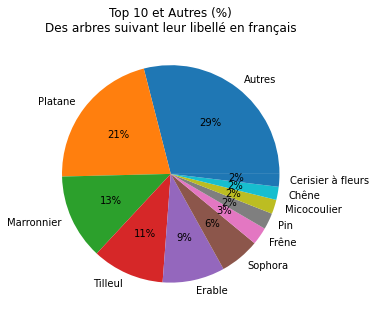

In [20]:
graph_pie(df_clean["LIBELLE_FRANCAIS_NEW"], "Top 10 et Autres (%)\nDes arbres suivant leur libellé en français", dim_fig)

**Synthèse :**

- Le genre <code>**Platane**</code> est le plus représenté

**<center><font color=DarkRed>DOMANIALITE</font></center>**

**Observation de la variable :**

- **10** valeurs uniques
- **1** valeurs manquantes

In [21]:
# Uniformisation du format des entrées en les mettant en majuscules
df_clean["DOMANIALITE"] = df_clean["DOMANIALITE"].str.upper()

# Filtre sur les valeurs non-nulles
df_clean = df_clean[df_clean["DOMANIALITE"].notnull()]
print("Le DataFrame a " + str(df_clean.shape[0]) + " lignes (une en moins).\n"
      "Il y a " + str(df_clean["DOMANIALITE"].nunique()) + " valeurs uniques pour la variable DOMANIALITE :")

print(df_clean["DOMANIALITE"].unique())

Le DataFrame a 198639 lignes (une en moins).
Il y a 9 valeurs uniques pour la variable DOMANIALITE :
['JARDIN' 'ALIGNEMENT' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES']


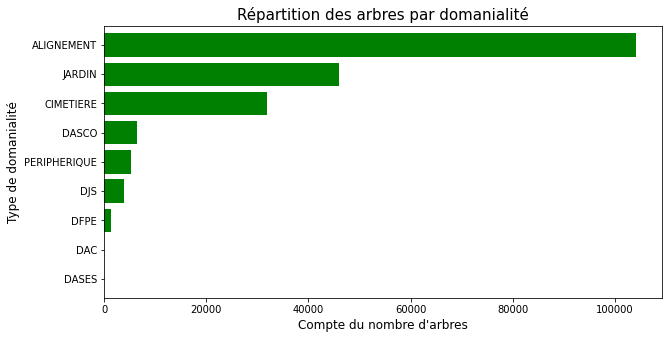

In [22]:
# Représentation graphique
graph_barh(df_clean["DOMANIALITE"], "Répartition des arbres par domanialité", "Type de domanialité", "Compte du nombre d'arbres", dim_fig, color="green")


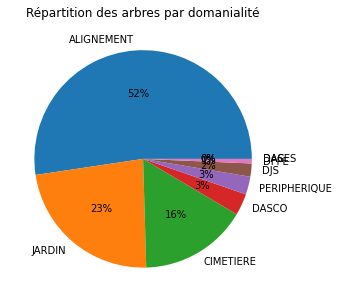

In [23]:
# Représentation graphique = diagramme circulaire
graph_pie(df_clean["DOMANIALITE"], "Répartition des arbres par domanialité", dim_fig)

**Synthèse** : 

C'est <code>**Alignement**</code>, <code>**Jardin**</code> et <code>**Cimetière**</code> qui ressortent le plus souvent

**<center><font color=DarkRed>REMARQUABLE</font></center>**

**Observation de la variable :**


- **3** valeurs uniques
- **63098** valeurs manquantes

Cette variable est de type **float**, or elle devrait être de type **booléen**, car elle est soit vraie soit fausse.
Je vais donc remplacer les valeurs comme suit : 

- <code>0</code> devient <code>Non ;
- <code>1</code> devient <code>Oui</code> ;
- les valeurs manquantes deviennent <code>Non spécifié</code>.


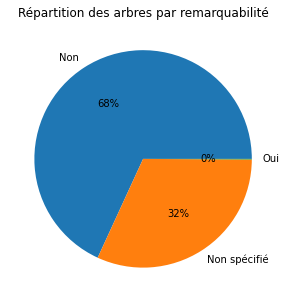

In [24]:
# Remplacement des 0 et 1 en Non et Oui
df_clean["REMARQUABLE"].replace({0:"Non", 1:"Oui"}, inplace=True)
df_clean["REMARQUABLE"].value_counts(dropna=False)

# Remplissage des vides avec "Non Spécifié"
df_clean["REMARQUABLE"].fillna("Non spécifié", inplace = True)

# Représentation graphique = diagramme circulaire

graph_pie(df_clean["REMARQUABLE"], "Répartition des arbres par remarquabilité", dim_fig)


In [25]:
# Création d'un filtre sur les arbres remarquables
filter_rmqbl = df_clean["REMARQUABLE"] == "Oui"
filtered_df = df_clean[filter_rmqbl]
print("Nous avons " + '\033[1m' + str(filtered_df.shape[0]) + " arbres remarquables" + '\033[0m')

Nous avons 183 arbres remarquables


#### **<center><font color=DarkRed>ARRONDISSEMENT</font></center>**

**Observation de la variable :**

- **25** valeurs uniques
- **aucune** valeurs manquantes

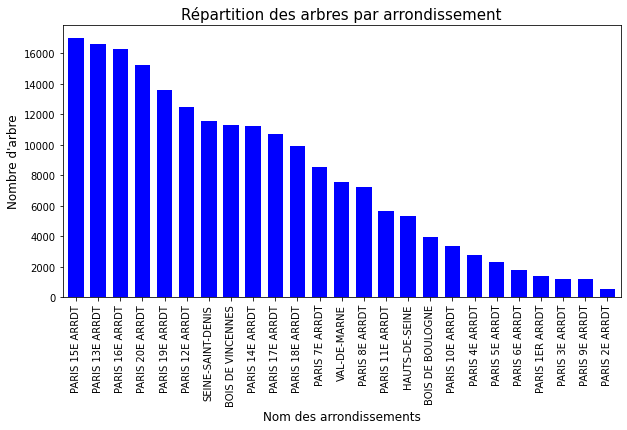

In [26]:
# Nombre d'arbre par arrondissement
graph_bar(df_clean["ARRONDISSEMENT"],"Répartition des arbres par arrondissement", "Nombre d'arbre", "Nom des arrondissements",dim_fig, color="blue")

In [27]:
# Nombre d'arbre par arrondissement
print(df_clean["ARRONDISSEMENT"].value_counts())

PARIS 15E ARRDT      16985
PARIS 13E ARRDT      16592
PARIS 16E ARRDT      16305
PARIS 20E ARRDT      15255
PARIS 19E ARRDT      13597
PARIS 12E ARRDT      12472
SEINE-SAINT-DENIS    11561
BOIS DE VINCENNES    11298
PARIS 14E ARRDT      11235
PARIS 17E ARRDT      10712
PARIS 18E ARRDT       9929
PARIS 7E ARRDT        8555
VAL-DE-MARNE          7564
PARIS 8E ARRDT        7229
PARIS 11E ARRDT       5643
HAUTS-DE-SEINE        5295
BOIS DE BOULOGNE      3952
PARIS 10E ARRDT       3358
PARIS 4E ARRDT        2732
PARIS 5E ARRDT        2329
PARIS 6E ARRDT        1751
PARIS 1ER ARRDT       1383
PARIS 3E ARRDT        1201
PARIS 9E ARRDT        1161
PARIS 2E ARRDT         545
Name: ARRONDISSEMENT, dtype: int64


- Il y a plus d'arbres dans les arrondissements du **15eme**, **13eme** et **16eme**

**<center><font color=DarkRed>STADE_DEVELOPPEMENT</font></center>**

**Observation de la variable :**

- **4** valeurs uniques
- **63098** valeurs manquantes


Je modifie les valeurs de cette variable en des valeurs plus explicite comme suit :

- <code>J</code> devient <code>1 - JEUNE</code> ;
- <code>JA</code> devient <code>2 - JEUNE ADULTE</code> ;
- <code>A</code> devient <code>3 - ADULTE</code> ;
- <code>M</code> devient <code>4 - MATURE</code>. 

Je remplace les valeurs manquantes par <code>**0 - Non spécifié**</code>. je ne les supprime pas, car il y a tout de même 31,5% de données qui sont intéressante pour notre analyse.


In [28]:
# Remplacement des valeurs uniques par des valeurs plus explicites
df_clean["STADE_DEVELOPPEMENT"].replace({"J":"1 - JEUNE", "JA":"2 - JEUNE ADULTE", "A":"3 - ADULTE", \
                                   "M":"4 - MATURE"}, inplace=True)

# Remplacement des valeurs vides par "Non spécifié"
df_clean["STADE_DEVELOPPEMENT"].fillna("0 - Non Spécifié", inplace=True)
print(df_clean["STADE_DEVELOPPEMENT"].value_counts(dropna=False))

0 - Non Spécifié    66857
3 - ADULTE          64032
2 - JEUNE ADULTE    35048
1 - JEUNE           26604
4 - MATURE           6098
Name: STADE_DEVELOPPEMENT, dtype: int64


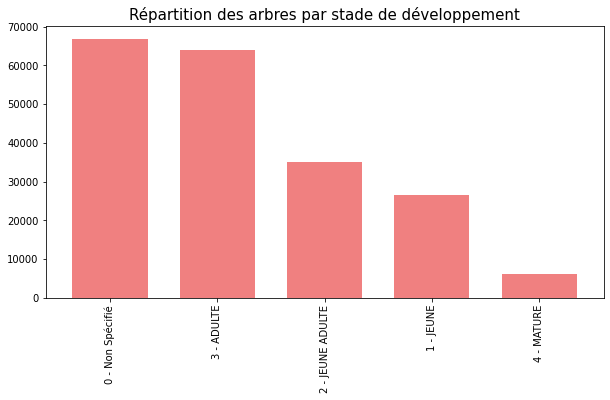

In [29]:
# Représentation graphique
graph_bar(df_clean["STADE_DEVELOPPEMENT"],"Répartition des arbres par stade de développement", dim_fig=dim_fig, color="lightcoral")

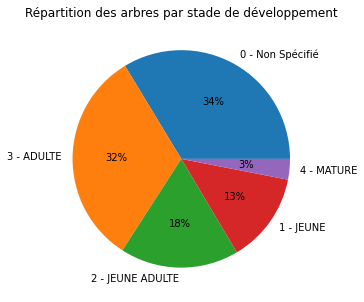

In [30]:
# Représentation graphique = diagramme circulaire
graph_pie(df_clean["STADE_DEVELOPPEMENT"], "Répartition des arbres par stade de développement", dim_fig)


### <center><font color=DarkBlue>2.2.2 Nettoyage des données QUANTITATIVE</font>

**<center><font color=DarkRed>CIRCONFERENCE_CM et HAUTEUR_M</font> </center>**

Je vais afficher des indicateurs statistiques de base pour les variables quantitatives avec la méthode <code>.describe()</code> décrit dans la partie 1 au chapitre **Description du jeu de données**.


In [31]:
# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONFERENCE_CM","HAUTEUR_M"]
round(df_clean[variable_num].describe(),2)

,CIRCONFERENCE_CM,HAUTEUR_M
count,198639.00,198639.00
mean,83.56,13.16
std,675.69,1978.64
min,0.00,0.00
25%,30.00,5.00
50%,70.00,8.00
75%,115.00,12.00
max,250255.00,881818.00


Text(0.5, 1.0, 'Boite à moustaches pour la Circonférence')

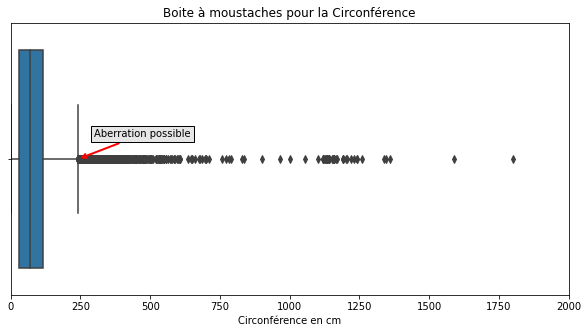

In [32]:
fig= plt.figure(figsize=dim_fig)
ax = sns.boxplot(x=df_clean['CIRCONFERENCE_CM'])
ax.set(xlim=(0,2000))

ax.annotate('Aberration possible',
            xy=(242.5,0),
            xytext=(300,-0.08),
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9"))

plt.xlabel("Circonférence en cm")
plt.title("Boite à moustaches pour la Circonférence")

Text(0.5, 1.0, 'Boite à moustaches pour la Hauteur')

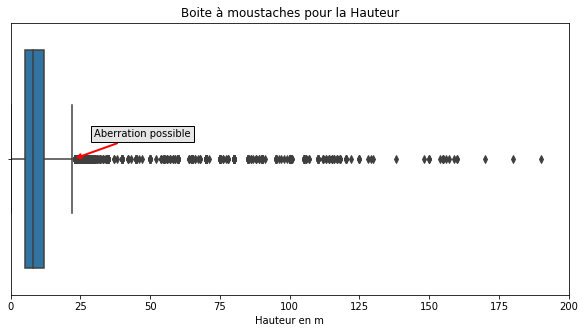

In [33]:
fig= plt.figure(figsize=dim_fig)
ax = sns.boxplot(x=df_clean['HAUTEUR_M'])
ax.set(xlim=(0,200))

ax.annotate('Aberration possible',
            xy=(22.5,0),
            xytext=(30,-0.08),
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9"))

plt.xlabel("Hauteur en m")
plt.title("Boite à moustaches pour la Hauteur")

- la **plus petite valeur pour chacune des 2 variables est "0"**; dans les 2 cas, cela veut dire que l'arbre n'existe pas !
- pour la circonférence, la **plus grande valeur est 250.255 cm**, c'est-à-dire, plus de 2,5km de circonférence !
- pour la hauteur, la **plus grande valeur est 881.818 m**, c'est-à-dire, plus de 881km de hauteur !

Il est évident que nous avons affaire à des <font color=blue>valeurs aberrantes</font> qu'il faudrait traiter, soit en les corrigeant, soit en les éliminant. En effet, ces valeurs faussent les autres indicateurs statistiques qui ont été calculées.

Les boites à moustaches, nous indiquent :
- Pour la circonference : Aberration possible à partir de **242.5cm**
- Pour la hauteur : Aberration possible à partir de **22.5m**

Je vais procéder à un premier nettoyage par **la suppression des valeurs aberrantes**, puis je vais compléter l'analyse par un nettoyage statistique si nécessaire, c'est à dire le repérage des **valeurs atypique ou rares**.

**<center><font color=red>Nettoyage des valeurs aberrantes</font></center>**
<br>
Un platane d'Orient du Parc Monceau (8e arrondissement) affiche **la plus grande circonférence: 8 mètres, soit 800 centimètres** (voir article https://www.pariszigzag.fr/secret/lieux-insolites/arbres-remarquables-paris).

Un platane d'Orient du jardin de l’hôtel de Villeroy (7e arrondissement), mesure **30 mètres de haut** (voir article : https://agriculture.gouv.fr/le-plus-grand-arbre-de-paris-veille-sur-le-78-rue-de-varenne) .
    
J'applique ces limites à mes données : le nouveau dataframe s'appellera **<font color=DarkRed>df_clean_outliers</font>**.

In [34]:
# Analyse de la distribution des variables
df_clean_outliers = df_clean[((df_clean["CIRCONFERENCE_CM"] > 0) & (df_clean["CIRCONFERENCE_CM"] <= 800)) \
                & ((df_clean["HAUTEUR_M"] > 0) & (df_clean["HAUTEUR_M"] <= 30))]

# Filtre sur les 2 colonnes qui m'intéresse
variable_num = ["CIRCONFERENCE_CM","HAUTEUR_M"]
round(df_clean_outliers[variable_num].describe(),2)

,CIRCONFERENCE_CM,HAUTEUR_M
count,158555.00,158555.00
mean,92.63,10.38
std,58.76,5.12
min,1.00,1.00
25%,50.00,6.00
50%,80.00,10.00
75%,125.00,14.00
max,790.00,30.00


**<center><font color=red>Nettoyage "statistique"</font></center>**

Le nettoyage statistique utilise une **mesure de dispersion** nommée <font color=DarkRed>l'écart interquartile</font> (EI ou *IQR pour InterQuartile Range en anglais*) afin de déterminer des limites basses et hautes de la variable étudiée, et permet ainsi d'exclure les variables au-delà de ces limites. 

L'**IQR** se calcule en faisant la différence entre le 3e et le 1er quartile (**Q3 - Q1**), 
- la **limite basse** par la différence entre le 1er quartile et 1,5 fois l'IQR (**Q1 - 1,5 IQR**), 
- la **limite haute** par l'addition de 1,5 fois l'IQR au 3e quartile (**Q3 + 1,5 IQR**).

In [35]:
# Calcul des indicateurs pour la circonférence
Q1_circ = round(df_clean_outliers["CIRCONFERENCE_CM"]. quantile(0.25),1) # Calcul du 1er quartile
Q3_circ = round(df_clean_outliers["CIRCONFERENCE_CM"]. quantile(0.75),1) # Calcul du 3e quartile
IQR_circ = round(Q3_circ - Q1_circ,1) # IQR (InterQuartile Range)
bas_circ = round(Q1_circ -(1.5 * IQR_circ),1)
haut_circ = round(Q3_circ +(1.5 * IQR_circ),1)

print('\033[1m' + "Pour la série des circonférences :" + '\033[0m' + "\n"
      + '\033[1m' + "1er quartile :" + '\033[0m' + str(Q1_circ) + "\n"
      + '\033[1m' + "3e quartile :" + '\033[0m' + str(Q3_circ) + "\n"
      + '\033[1m' + "IQR :"+ '\033[0m' + str(IQR_circ) + "\n"
      + '\033[1m' + "Limite basse :" + '\033[0m' + str(bas_circ) + "\n"
      + '\033[1m' + "Limite haute :"+ '\033[0m' + str(haut_circ))

# Calcul des indicateurs pour la hauteur
Q1_htr = round(df_clean_outliers["HAUTEUR_M"]. quantile(0.25),1) # Calcul du 1er quartile
Q3_htr = round(df_clean_outliers["HAUTEUR_M"]. quantile(0.75),1) # Calcul du 3e quartile
IQR_htr = round(Q3_htr - Q1_htr,1) # IQR (InterQuartile Range)
bas_htr = round(Q1_htr -(1.5 * IQR_htr),1)
haut_htr = round(Q3_htr +(1.5 * IQR_htr),1)
print("-------------------------------------")
print('\033[1m' + "Pour la série des hauteurs :" + '\033[0m' + "\n"
      + '\033[1m' + "1er quartile :"+ '\033[0m' + str(Q1_htr)  + "\n"
      + '\033[1m' + "3e quartile :"+ '\033[0m' + str(Q3_htr) +  "\n"
      + '\033[1m' + "IQR :" + '\033[0m' + str(IQR_htr) +  ".\n"
      + '\033[1m' + "Limite basse :"+ '\033[0m' + str(bas_htr) + "\n"
      + '\033[1m' + "Limite haute :"+ '\033[0m' + str(haut_htr))




Pour la série des circonférences :
1er quartile :50.0
3e quartile :125.0
IQR :75.0
Limite basse :-62.5
Limite haute :237.5
-------------------------------------
Pour la série des hauteurs :
1er quartile :6.0
3e quartile :14.0
IQR :8.0.
Limite basse :-6.0
Limite haute :26.0


In [36]:
# Analyse de la distribution des variables - connaissance métier
df_stat = df_clean_outliers[((df_clean_outliers["CIRCONFERENCE_CM"] > 0) & (df_clean_outliers["CIRCONFERENCE_CM"] <= haut_circ)) \
                & ((df_clean_outliers["HAUTEUR_M"] > 0) & (df_clean_outliers["HAUTEUR_M"] <= haut_htr))]

# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONFERENCE_CM","HAUTEUR_M"]
round(df_stat[variable_num].describe(),2)

,CIRCONFERENCE_CM,HAUTEUR_M
count,154664.00,154664.0
mean,88.03,10.1
std,50.87,4.8
min,1.00,1.0
25%,48.00,6.0
50%,80.00,10.0
75%,120.00,14.0
max,237.00,26.0


Ce nettoyage nous renseigne sur les **valeurs rares** des circonférences et des hauteurs de nos arbres :
- Une circonférence au-delà de **237 centimètres** est considérée comme **rare** ;
- Une hauteur au-delà de **26 mètres** est considérée comme **rare**.

Le nettoyage statistique me permet de visualiser les limites des données en excluant les **valeurs rares**.

### <center><font color=DarkBlue>2.2.3 Analyse statistique bivariée et multivariée</font>
    
Pour aller plus loin, je vais réaliser : 
- une **analyse statistique bivariée** (c'est à dire l'étude des relations entre deux variables, celles-ci pouvant être quantitatives ou qualitatives)
- une **analyse statistique multivariée** (elle permet d'établir un lien statistique entre plusieurs variables)
    
Pour **l'analyse bivariée**, je vais analyser :
- Les types d'arbres par arrondissement
- Les arbres remarquables par arrondissement
- Les types d'arbres par domanialité
- La domanialité par arrondissement
    
Pour **l'analyse multivariée**, je vais analyser : 
- la relation entre la hauteur, la circonférence et le stade de développement
- la relation entre la hauteur, la circonférence et les arbres remarquables
- la relation entre le type d'arbre, la domanialité et le stade de developpement

#### <center><font color=DarkGreen>2.2.3.1 Analyse statistique bivariée</font>

In [37]:
df_without_others = df_clean_outliers[df_clean_outliers['LIBELLE_FRANCAIS_NEW'] != 'Autres']

Text(0.5, 1.0, "Type d'arbre par arrondissement")

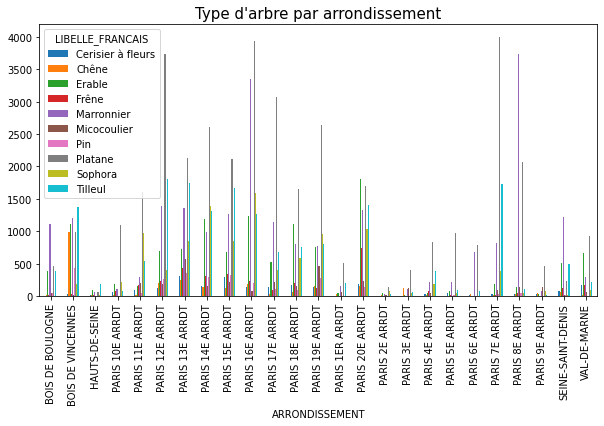

In [38]:
# Visualisation des type d'arbre par arrondissement
bar = pd.crosstab(df_without_others.ARRONDISSEMENT.sort_values(), df_without_others.LIBELLE_FRANCAIS.sort_values())
bar.plot.bar(figsize=dim_fig)
plt.ylabel("")
plt.title("Type d'arbre par arrondissement", fontsize=15)

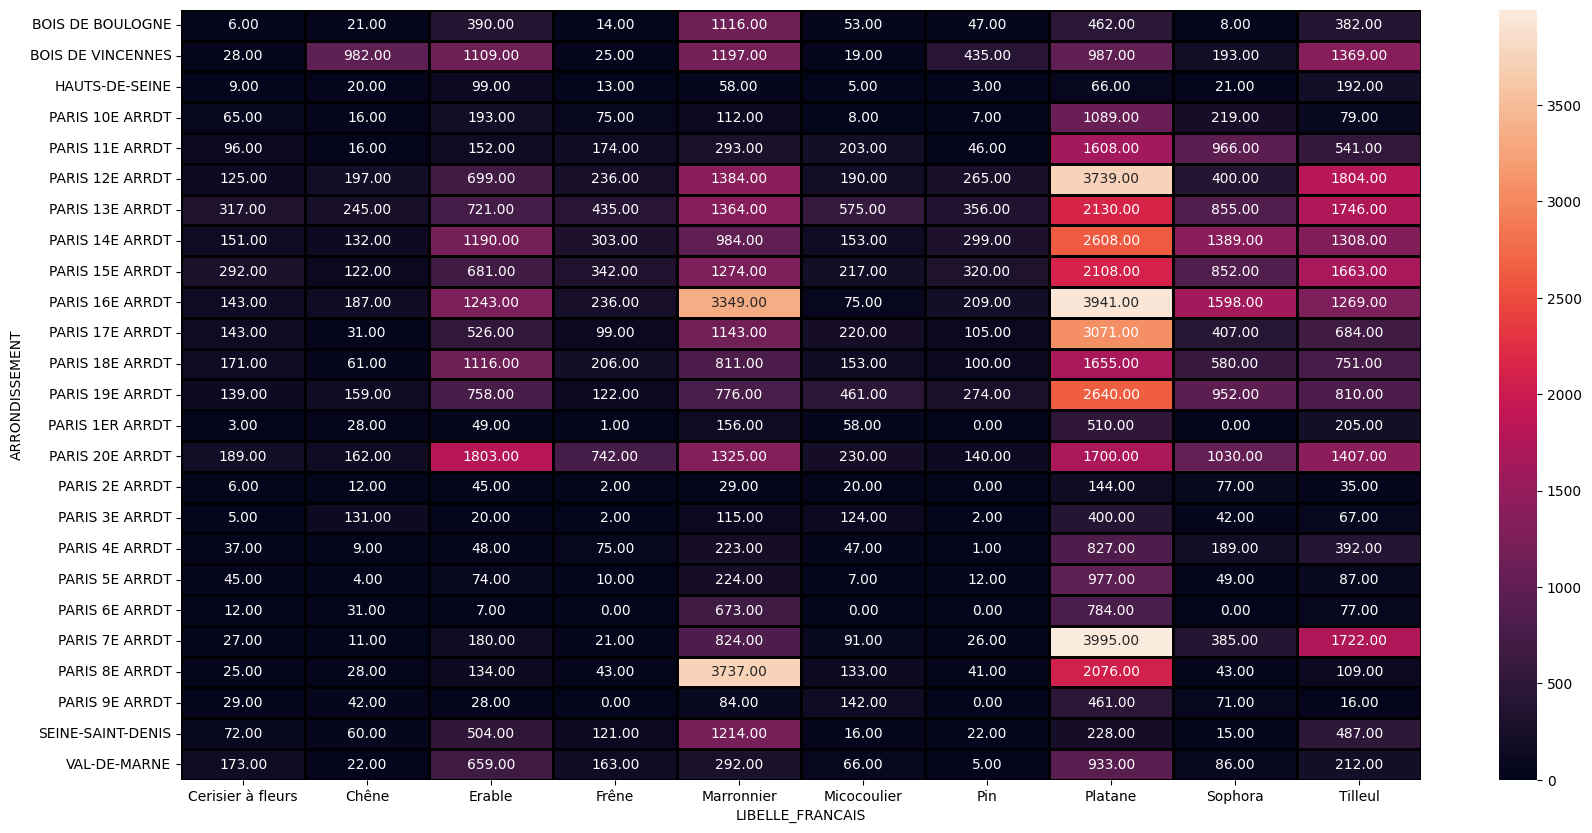

In [39]:
# affichage de la carte thermiques en enlevant les valeurs autres
heatmap(df_without_others.ARRONDISSEMENT, df_without_others.LIBELLE_FRANCAIS, dim_fig)

Text(0.5, 1.0, "Type d'arbre par domanialité")

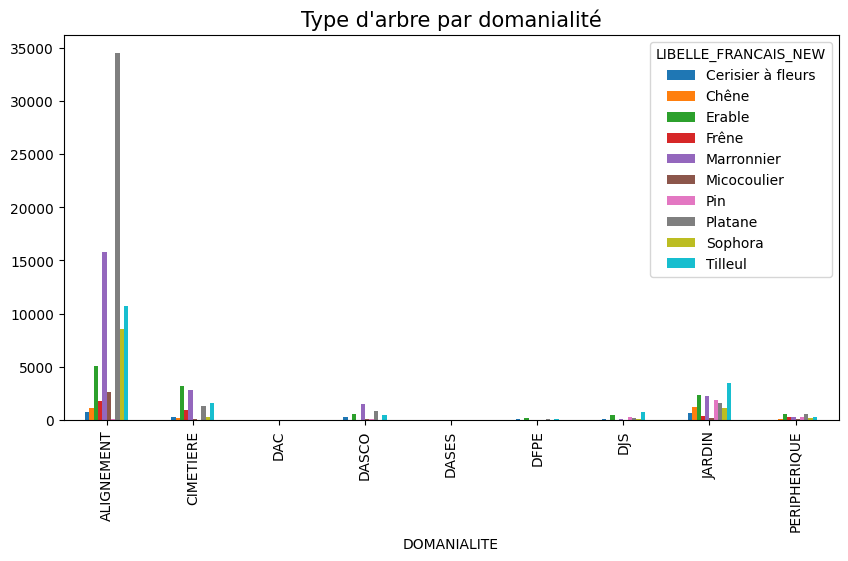

In [40]:
# Visualisation des type d'arbre par domanialité
bar = pd.crosstab(df_without_others.DOMANIALITE.sort_values(), df_without_others.LIBELLE_FRANCAIS_NEW.sort_values())
bar.plot.bar(figsize=dim_fig)
plt.ylabel("")
plt.title("Type d'arbre par domanialité", fontsize=15)

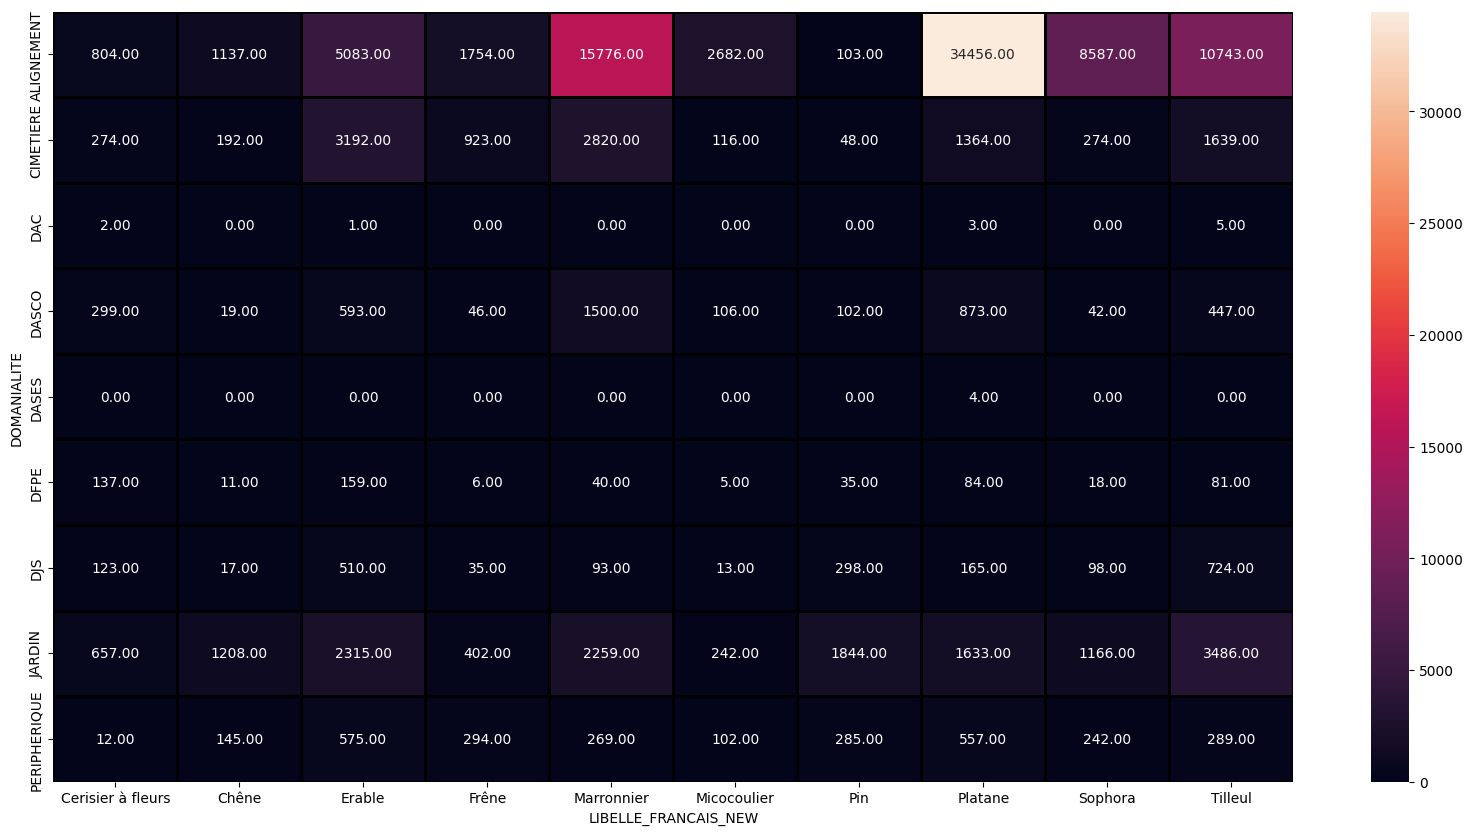

In [41]:
# affichage de la carte thermiques en enlevant les valeurs 'Autres' de la colonne 'LIBELLE_FRANCAIS'
heatmap(df_without_others.DOMANIALITE, df_without_others.LIBELLE_FRANCAIS_NEW, dim_fig)


Text(0.5, 1.0, 'Domanialité par arrondissement')

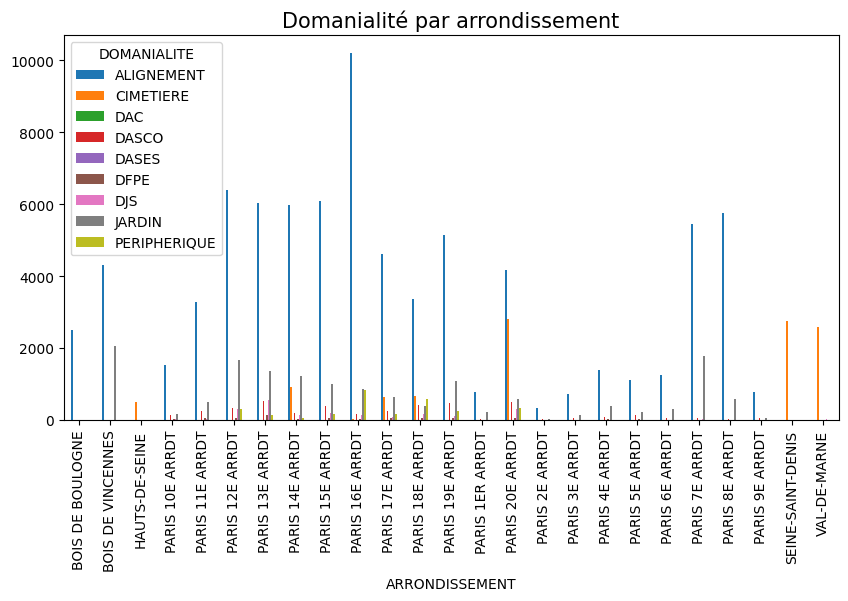

In [42]:
# Visualisation de la domanialité par arrondissement
bar = pd.crosstab(df_without_others.ARRONDISSEMENT.sort_values(), df_without_others.DOMANIALITE.sort_values())
bar.plot.bar(figsize=dim_fig)
plt.ylabel("")
plt.title("Domanialité par arrondissement", fontsize=15)

Text(0.5, 1.0, 'Répartition des arbres remarquable par arrondissement')

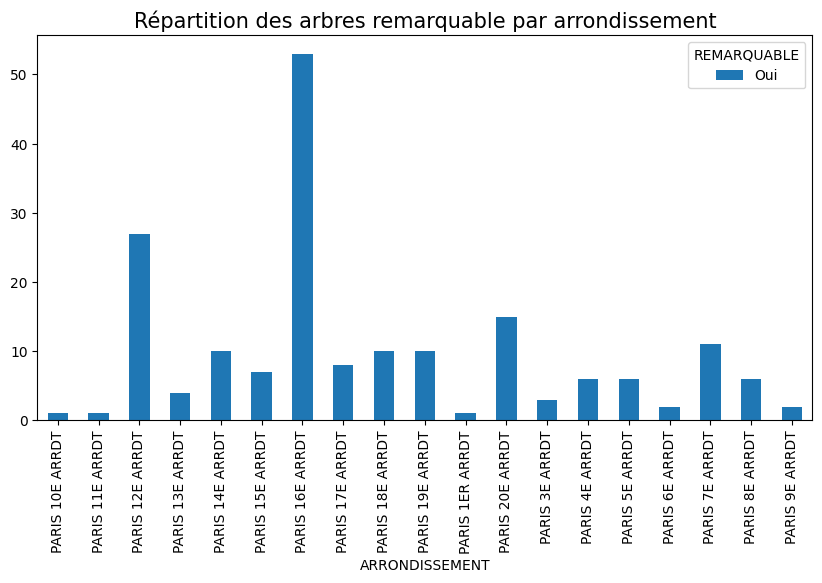

In [43]:
# Visualisation des arbres remarquables par arrondissement
bar = pd.crosstab(filtered_df.ARRONDISSEMENT.sort_values(), filtered_df.REMARQUABLE.sort_values())
bar.plot.bar(figsize=dim_fig)
plt.ylabel("")
plt.title("Répartition des arbres remarquable par arrondissement", fontsize=15)

#### <center><font color=DarkGreen>2.2.3.2 Test d'hypothese</font>
    
Le test d’hypothèse est une procédure de décision entre deux hypothèses. Il s'agit d'une démarche consistant à rejeter ou à ne pas rejeter une hypothèse statistique, appelée hypothèse nulle, en fonction d'un échantillon de données.
    
- **chi2** = il permet de tester l'adéquation d'une série de données à une famille de lois de probabilité ou de tester l'indépendance entre deux variables. (0 = relation entre les variable et 1 = pas de relation)
- **V cramer** = établir s'il existe un effet entre les deux variables qualitatives croisées dans un tableau de contigence (Proche de 1 = relation forte)

In [44]:
df_categorical = df_clean_outliers[["LIBELLE_FRANCAIS_NEW","STADE_DEVELOPPEMENT","REMARQUABLE","DOMANIALITE","ARRONDISSEMENT"]]


In [45]:
test_stat = test_chi2(df_categorical)
test_stat

,Num_var1,Num_var2,pvalues_chi2,V_cramer
4,STADE_DEVELOPPEMENT,REMARQUABLE,0.00000,42.04
9,DOMANIALITE,ARRONDISSEMENT,0.00000,30.71
7,REMARQUABLE,DOMANIALITE,0.00000,30.28
5,STADE_DEVELOPPEMENT,DOMANIALITE,0.00000,27.20
6,STADE_DEVELOPPEMENT,ARRONDISSEMENT,0.00000,19.44
2,LIBELLE_FRANCAIS_NEW,DOMANIALITE,0.00000,17.84
3,LIBELLE_FRANCAIS_NEW,ARRONDISSEMENT,0.00000,17.13
0,LIBELLE_FRANCAIS_NEW,STADE_DEVELOPPEMENT,0.00000,16.12
8,REMARQUABLE,ARRONDISSEMENT,0.00000,15.41
1,LIBELLE_FRANCAIS_NEW,REMARQUABLE,0.00000,14.61


**Synthèse** : 

**Type d'arbre par arrondissement :** 

- Les arbres les plus représentés dans ces arrondissements sont le <code>**Platane**</code>
- Le genre <code>**Platane**</code> est le plus représenté (principalement dans les arrondissements du 7e, 16e et 12e.
- Le genre <code>**Marrionnier**</code> est le plus représenté dans les arrondissements du 8e et du 16e

**Type d'arbre par domanialité :**

- <code>**Alignement**</code> : **Platane**  
- <code>**Jardin**</code>: **Tilleul**  
- <code>**Cimetière**</code>: **Erable**

**Domanialité par arrondissement:**

- Les arbres d'<code>**Alignement**</code> sont plus présents dans le 16e arrondissement

**Répartition des arbres remarquables par arrondissement :**
- Les **arbres remarquables** sont principalement dans le **16eme** arrondissement

#### <center><font color=DarkGreen>2.2.3.3 Analyse statistique multivariée</font>

Text(0.5, 1.0, 'Relation entre Hauteur, Circonférence et Stade de développement')

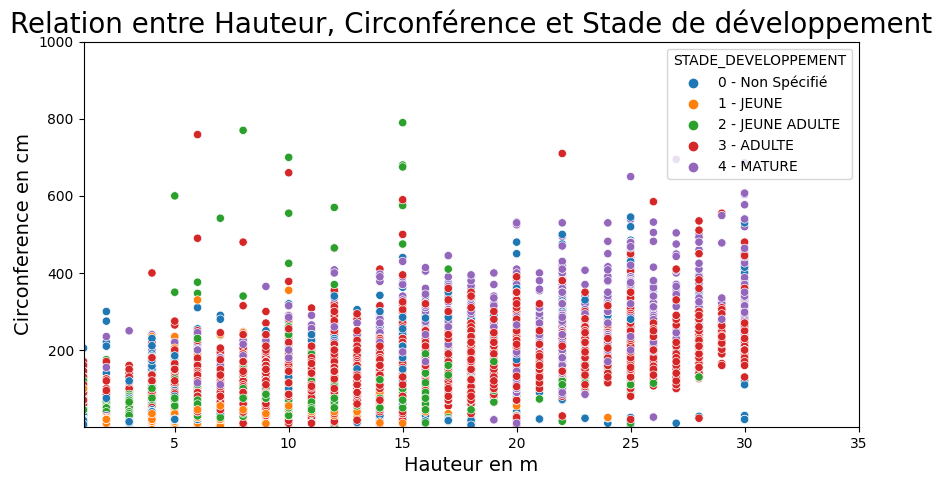

In [46]:
fig = plt.figure(figsize=dim_fig)

ax = sns.scatterplot(x='HAUTEUR_M',
                     y='CIRCONFERENCE_CM',
                     data=df_clean_outliers,
                     hue="STADE_DEVELOPPEMENT",
                     hue_order=['0 - Non Spécifié','1 - JEUNE', '2 - JEUNE ADULTE', '3 - ADULTE', '4 - MATURE', ])
ax.set(xlim=(1, 35), ylim=(1, 1000))
plt.xlabel('Hauteur en m', fontsize=14)
plt.ylabel('Circonference en cm', fontsize=14)
plt.title('Relation entre Hauteur, Circonférence et Stade de développement', fontsize=20)


Text(0.5, 1.0, 'Relation entre Hauteur, Circonférence et Arbre remarquable')

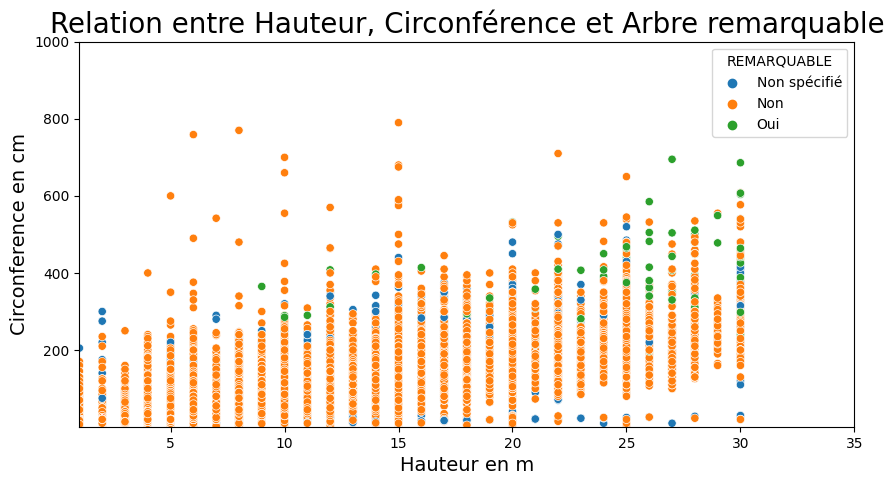

In [47]:
fig = plt.figure(figsize=dim_fig)

ax = sns.scatterplot(x='HAUTEUR_M',
                     y='CIRCONFERENCE_CM',
                     data=df_clean_outliers,
                     hue="REMARQUABLE",
                     hue_order=['Non spécifié','Non','Oui'])
ax.set(xlim=(1, 35), ylim=(1, 1000))

plt.xlabel('Hauteur en m', fontsize=14)
plt.ylabel('Circonference en cm', fontsize=14)
plt.title('Relation entre Hauteur, Circonférence et Arbre remarquable', fontsize=20)

Text(0.5, 1.0, "Relation entre Type d'arbre, Stade de developpement et Domanialité")

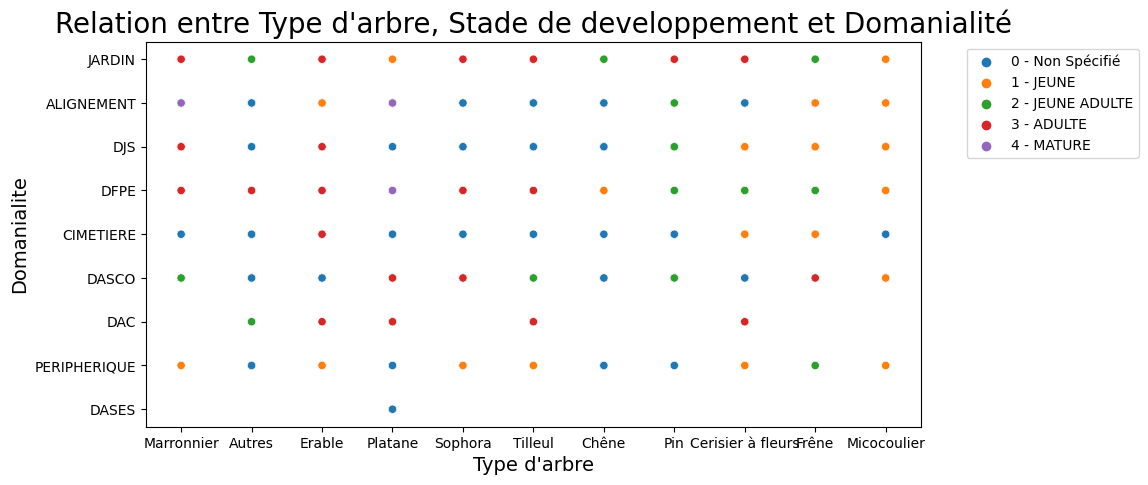

In [48]:
fig = plt.figure(figsize=dim_fig)

ax = sns.scatterplot(x='LIBELLE_FRANCAIS_NEW',
                     y='DOMANIALITE',
                     data=df_clean_outliers,
                     hue="STADE_DEVELOPPEMENT",
                     hue_order=['0 - Non Spécifié','1 - JEUNE', '2 - JEUNE ADULTE', '3 - ADULTE', '4 - MATURE', ])
#ax.set(xlim=(1, 50), ylim=(1, 1000))
plt.xlabel("Type d'arbre", fontsize=14)
plt.ylabel('Domanialite', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Relation entre Type d'arbre, Stade de developpement et Domanialité", fontsize=20)


**Synthèse :** 

- La relation entre <code>**la hauteur**</code> et <code>**la circonférence**</code> est relativement linéaire.  

- Il existe également une corrélation entre <code>**la circonférence**</code>, <code>**la hauteur**</code> des arbres et leur <code>**stade le développement**</code>.

- Les arbres <code>**remarquables**</code> font partie des arbres **les plus hauts** et avec **la plus grande circonférence**.

- Les arbres d'alignement <code>**Platane**</code> ont un stade de développement plutôt mature. 


### <center><font color=DarkBlue>2.3 Analyse géographique</font>

Les variables <code>**Latitude**</code> et <code>**Longitude**</code> sont difficile a analyser de manière isolée, ces données étants des coordonnées géographique, elles peuvent servir à localiser géographiquement les arbres sur une carte grâce à la librairie <code>**Folium**</code>.

Du fait du grand nombre de données dans le dataset (environ 200.000 arbres),les localiser sur la carte serait illisible.

Je choisis donc d'afficher seulement :
- **les 183 arbres remarquables de la ville**.
- **les arbres rares** (ayant une circonférence comprise entre 237cm et 800m et une hauteur comprise entre 26 et 30m).


#### <center><font color=DarkGreen>2.3.3.1 Arbres remarquables</font>

In [49]:
# Définition du point clé d'ouverture de la carte
paris = folium.Map(location = [48.85, 2.35])

def format_data(row):
    output = ""
    output = output + "- LIBELLE :" + str(row["LIBELLE_FRANCAIS"]) + '<br>'
    output = output + "- STADE_DEVELOPPEMENT :" + str(row["STADE_DEVELOPPEMENT"]) + '<br>'
    output = output + "- DOMANIALITE :"+ str(row["DOMANIALITE"]) + '<br>'
    output = output + "- ARRONDISSEMENT :" + str(row["ARRONDISSEMENT"]) + '<br>'
    output = output + "- CIRCONFERENCE :" + str(row["CIRCONFERENCE_CM"]) + '<br>'
    output = output + "- HAUTEUR :" + str(row["HAUTEUR_M"]) + '<br>'
    return output

start = "\033[1m"
end = "\033[0;0m"


# Ajout d'un marqueur pour chaque arbre remarquable, avec son nom
for i in range(0,len(filtered_df)):
    folium.Marker(
        location = [filtered_df.iloc[i]["LATITUDE"], filtered_df.iloc[i]["LONGITUDE"]],
        popup = folium.Popup(format_data(filtered_df.iloc[i][:7]),min_width=300,max_width=300),
        icon = folium.Icon(icon_color="white")
    ).add_to(paris)

# Création des limites de zoom de la carte
sud_ouest = filtered_df[["LATITUDE","LONGITUDE"]].min().values.tolist()
nord_est = filtered_df[["LATITUDE","LONGITUDE"]].max().values.tolist()

# Appel du zoom maximum possible
paris.fit_bounds([sud_ouest,nord_est])

# Appel de la carte
paris

#### <center><font color=DarkGreen>2.3.3.2 Arbres rares</font>

In [50]:
arbre_rare = df_clean_outliers[(df_clean_outliers['CIRCONFERENCE_CM'] >= 237) & (df_clean_outliers['CIRCONFERENCE_CM'] <= 800) & 
    (df_clean_outliers['HAUTEUR_M'] >= 26) & (df_clean_outliers['HAUTEUR_M'] <=30)]
arbre_rare

,LIBELLE_FRANCAIS,STADE_DEVELOPPEMENT,REMARQUABLE,DOMANIALITE,ARRONDISSEMENT,CIRCONFERENCE_CM,HAUTEUR_M,LATITUDE,LONGITUDE,LIBELLE_FRANCAIS_NEW
388,Platane,0 - Non Spécifié,Non spécifié,JARDIN,PARIS 12E ARRDT,370,27,48.835025,2.384074,Platane
656,Platane,0 - Non Spécifié,Non spécifié,JARDIN,PARIS 12E ARRDT,415,30,48.833695,2.383469,Platane
657,Platane,4 - MATURE,Non,JARDIN,PARIS 12E ARRDT,380,30,48.833756,2.383434,Platane
658,Platane,0 - Non Spécifié,Non spécifié,JARDIN,PARIS 12E ARRDT,425,30,48.833887,2.383258,Platane
786,Platane,4 - MATURE,Non,JARDIN,PARIS 12E ARRDT,365,30,48.835125,2.381761,Platane
...,...,...,...,...,...,...,...,...,...,...
189805,Sequoia,3 - ADULTE,Non,JARDIN,BOIS DE VINCENNES,410,27,48.832181,2.453608,Autres
190055,Peuplier,3 - ADULTE,Non,JARDIN,BOIS DE VINCENNES,270,30,48.833017,2.450751,Autres
195972,Platane,3 - ADULTE,Non,JARDIN,PARIS 12E ARRDT,535,28,48.823750,2.458381,Platane
195984,Platane,3 - ADULTE,Non,JARDIN,PARIS 12E ARRDT,450,28,48.823521,2.458743,Platane


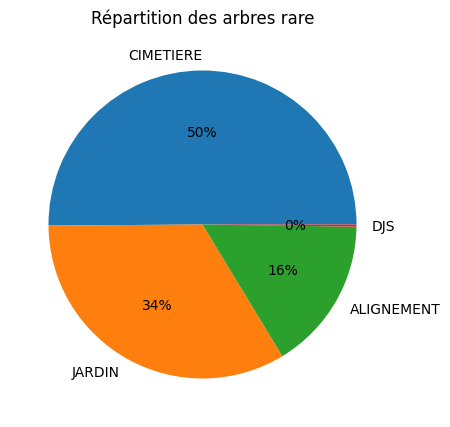

In [51]:
# Représentation graphique = diagramme circulaire
graph_pie(arbre_rare["DOMANIALITE"], "Répartition des arbres rare", dim_fig)

In [52]:
arbre_rare.STADE_DEVELOPPEMENT

388       0 - Non Spécifié
656       0 - Non Spécifié
657             4 - MATURE
658       0 - Non Spécifié
786             4 - MATURE
                ...       
189805          3 - ADULTE
190055          3 - ADULTE
195972          3 - ADULTE
195984          3 - ADULTE
198574          4 - MATURE
Name: STADE_DEVELOPPEMENT, Length: 441, dtype: object

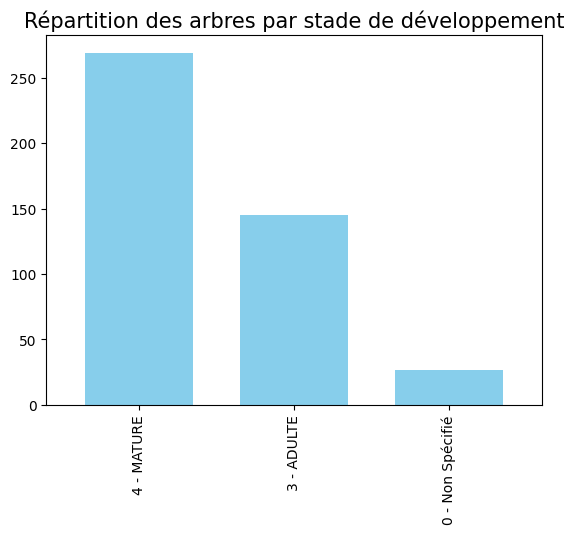

In [63]:
#Représentation graphique du stade de developpement
graph_bar(arbre_rare["STADE_DEVELOPPEMENT"], "Répartition des arbres rare par stade de développement",color="skyblue")


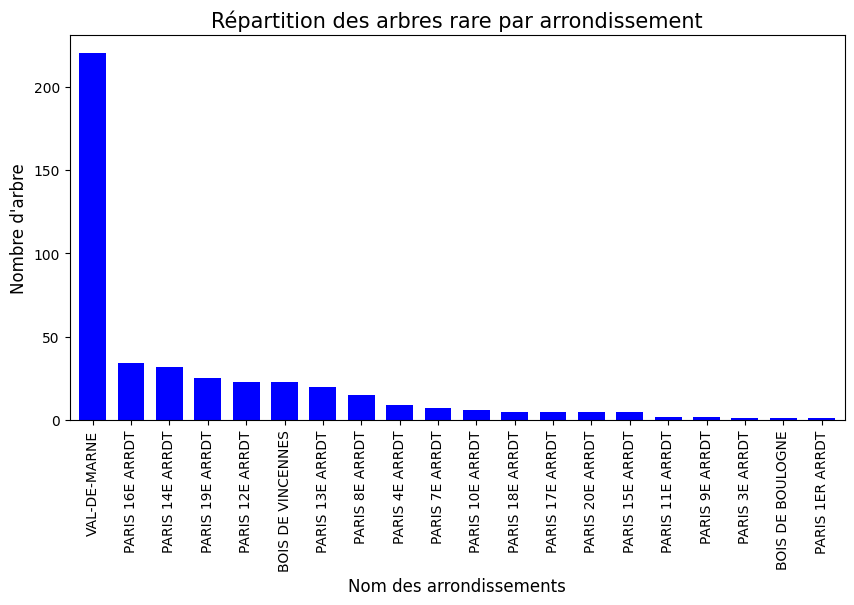

In [54]:
# Nombre d'arbre rare par arrondissement
graph_bar(arbre_rare["ARRONDISSEMENT"],"Répartition des arbres rare par arrondissement", "Nombre d'arbre", "Nom des arrondissements",dim_fig, color="blue")

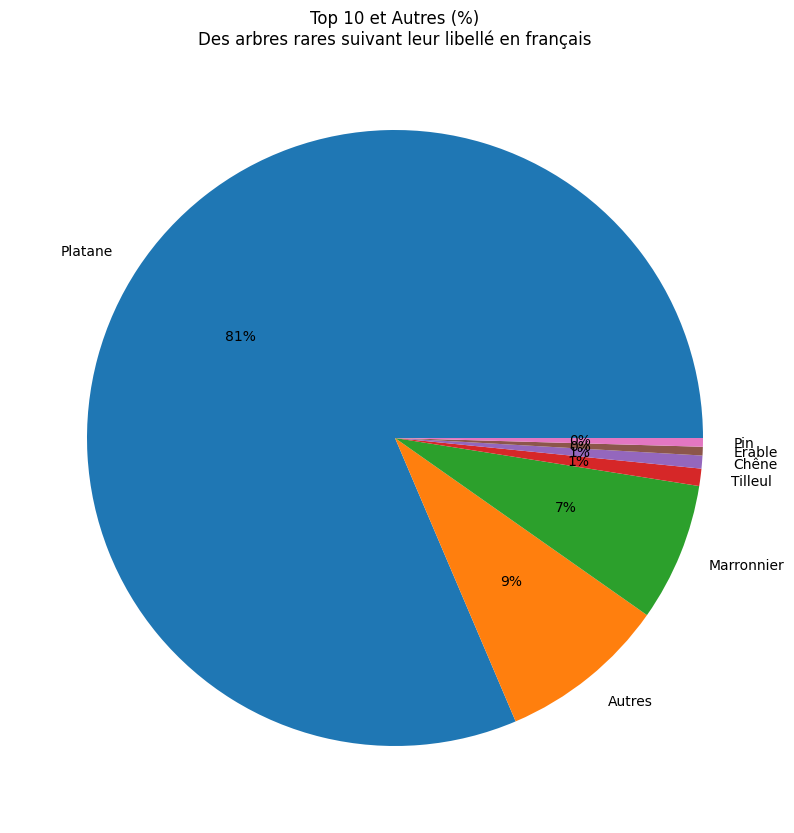

In [75]:
graph_pie(arbre_rare["LIBELLE_FRANCAIS_NEW"], "Top 10 et Autres (%)\nDes arbres rares suivant leur libellé en français", [15,10])

In [56]:
# Définition du point clé d'ouverture de la carte
paris = folium.Map(location = [48.85, 2.35])

start = "\033[1m"
end = "\033[0;0m"

# Ajout d'un marqueur pour chaque arbre remarquable, avec son nom
for i in range(0,len(arbre_rare)):
    folium.Marker(
        location = [arbre_rare.iloc[i]["LATITUDE"], arbre_rare.iloc[i]["LONGITUDE"]],
        popup = folium.Popup(format_data(arbre_rare.iloc[i][:7]),min_width=300,max_width=300),
        icon = folium.Icon(icon_color="white")
    ).add_to(paris)

# Création des limites de zoom de la carte
sud_ouest = arbre_rare[["LATITUDE","LONGITUDE"]].min().values.tolist()
nord_est = arbre_rare[["LATITUDE","LONGITUDE"]].max().values.tolist()

# Appel du zoom maximum possible
paris.fit_bounds([sud_ouest,nord_est])

# Appel de la carte
paris

## <center><font color=red>3. - Synthèse de l'analyse de données</font></center>

Après avoir bien exploré notre jeu de données, je peux faire une synthèse fiable.

Je vais afficher pour cela quelques indicateurs : 

- Le jeu de données filtré par arbres rares
- Le jeu de données nettoyé sans les outliers répertoriant les données les plus pertinentes

Pour cela, j'affiche quelques indicateurs sur les arbres rares et sur le dataset général.

In [57]:
# Description des variables qualitatives
variable_quali = ["LIBELLE_FRANCAIS","LIBELLE_FRANCAIS_NEW","STADE_DEVELOPPEMENT","REMARQUABLE","DOMANIALITE","ARRONDISSEMENT"]
#df_clean_outliers[variable_quali].describe()
arbre_rare[variable_quali].describe()

,LIBELLE_FRANCAIS,LIBELLE_FRANCAIS_NEW,STADE_DEVELOPPEMENT,REMARQUABLE,DOMANIALITE,ARRONDISSEMENT
count,441,441,441,441,441,441
unique,18,7,3,3,4,20
top,Platane,Platane,4 - MATURE,Non,CIMETIERE,VAL-DE-MARNE
freq,359,359,269,364,221,220


### <center><font color=DarkBlue>3.1 Synthese  du jeu de données contenant les données sur les arbres rares</font>

In [58]:
synthese_data(arbre_rare[variable_quali], arbre_rare)


     >    LIBELLE_FRANCAIS
     ------------------------------------------------
                         Compte par100
Platane                     359  81.4%
Marronnier                   32   7.3%
Peuplier                     12   2.7%
Pterocarya                    7   1.6%
Sequoia                       6   1.4%
Tilleul                       4   0.9%
Saule                         3   0.7%
Chêne                         3   0.7%
Noyer                         2   0.5%
Arbre aux quarante écus       2   0.5%
Tulipier                      2   0.5%
Erable                        2   0.5%
Pin                           2   0.5%
Hêtre                         1   0.2%
Fevier                        1   0.2%
Paulownia                     1   0.2%
Cyprès Chauve                 1   0.2%
Orme de Sibérie               1   0.2%

     >    LIBELLE_FRANCAIS_NEW
     ------------------------------------------------
            Compte par100
Platane        359  81.4%
Autres          39   8.8%
Marronnier   

In [59]:
# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONFERENCE_CM","HAUTEUR_M"]
round(arbre_rare[variable_num].describe(),2)

,CIRCONFERENCE_CM,HAUTEUR_M
count,441.00,441.00
mean,304.60,28.20
std,80.22,1.48
min,237.00,26.00
25%,253.00,27.00
50%,272.00,28.00
75%,322.00,30.00
max,695.00,30.00


### <center><font color=DarkBlue>3.2 Synthese  du jeu de données contenant les données les plus pertinantes</font>

In [60]:
print("Le jeu de données considéré comme fiable représente " \
      + str(round(len(df_clean_outliers)/len(df)*100,0)) + " % du jeu de données initial.")

Le jeu de données considéré comme fiable représente 79.0 % du jeu de données initial.


In [61]:
synthese_data(df_clean_outliers[variable_quali], df_clean_outliers)


     >    LIBELLE_FRANCAIS
     ------------------------------------------------
            Compte par100
Platane      39139  24.7%
Marronnier   22757  14.4%
Tilleul      17414  11.0%
Erable       12428   7.8%
Sophora      10427   6.6%
...            ...    ...
Cordyline        1   0.0%
Pistachier       1   0.0%
Raisinier        1   0.0%
Hiba             1   0.0%
Alangium         1   0.0%

[169 rows x 2 columns]

     >    LIBELLE_FRANCAIS_NEW
     ------------------------------------------------
                   Compte par100
Autres              41912  26.4%
Platane             39139  24.7%
Marronnier          22757  14.4%
Tilleul             17414  11.0%
Erable              12428   7.8%
Sophora             10427   6.6%
Frêne                3460   2.2%
Micocoulier          3266   2.1%
Chêne                2729   1.7%
Pin                  2715   1.7%
Cerisier à fleurs    2308   1.5%

     >    STADE_DEVELOPPEMENT
     ------------------------------------------------
               

In [62]:
# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONFERENCE_CM","HAUTEUR_M"]
round(df_clean_outliers[variable_num].describe(),2)

,CIRCONFERENCE_CM,HAUTEUR_M
count,158555.00,158555.00
mean,92.63,10.38
std,58.76,5.12
min,1.00,1.00
25%,50.00,6.00
50%,80.00,10.00
75%,125.00,14.00
max,790.00,30.00


Je peux conclure que le **patrimoine arboré de la ville de Paris** présente les caractéristiques suivantes :

**<center>Tableau de synthèse des arbres en générale</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre d'arbre** | 158.555 |
| **Type d'arbre** | 169 de type platane (24,5%) |
| **Domanialité** | Alignement (62%) |
| **Arrondissement** | 16e (9,4%) |
| **Stade de developpement** | Adulte (40%) |
| **Remarquabilité** | 171 |
| **Hauteur moyenne** | 10m |
| **Circonférence moyenne** |92cm |
| **Hauteur max** | 30m |
| **Circonférence max** | 800cm |

- On repertorie **158.555 arbres** avec les données les plus **pertinentes** possibles ;
- Il y a **169 types d'arbres** : celui le plus représenté est le **Platane**, comptant 39.139 individus (24,5% de la population totale) ;
- Ces arbres ont été majoritairement plantés en **"Alignement"** (62%), c'est-à-dire, le long des voies publiques, puis dans les **jardins publics** (17%) ;
- Le **16e arrondissement** regroupe la majeure partie de la population arborée (9,4%) sur un total de **25 arrondissements** ;
- Les arbres sont majoritairement **adultes** (près de 40 %), même si nous avons 19% d'individus dont le stade de développement n'est pas spécifié ;
- Les arbres remarquables quant à eux totalisent **171 individus** ;
- Les arbres mesurent **en moyenne 10 mètres de hauteur et 92 centimètres de circonférence** ;
- Il y a autant d'individus qui fait **moins de et plus de 10 mètres de hauteur** ;
- Il y a autant d'individus qui fait **moins de et plus de 80 centimètres de circonférence**.


Les caractéristiques ci-dessus comprennent également **441** arbres rares, dont voici les caractéristiques :

**<center>Tableau de synthèse des arbres rare</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre d'arbre** | 441 |
| **Type d'arbre** | 18 de type platane (81,4%) |
| **Domanialité** | Cimetière (50,1%) |
| **Arrondissement** | Val de marne (49,9%) |
| **Stade de developpement** | Mature (61%) |
| **Hauteur moyenne** | 28m |
| **Circonférence moyenne** |305cm |
| **Hauteur max** | 30m |
| **Circonférence max** | 695cm |

- Il y a 18 types d'arbre rare dont le plus représenté est le **Platane** comptant 359 individus (81,4% de la population totale);
- Ces arbres sont plantés principalement planté dans les **Cimetière** (50,1%), puis dans les **jardins publics** (33.6%);
- Le **val de marne** regroupe la majorité de la population arborée (49,9%);
- Les arbres sont majoritairement **Mature** (61%) ;
- Ces arbres font **en moyenne 28 mètres de hauteur et 305 centimètres de circonférence** ;
- Il y a autant d'individus qui fait **moins de et plus de 28 mètres de hauteur** ;
- Il y a autant d'individus qui fait **moins de et plus de 272 centimètres de circonférence**.
​
***
​
En connaissant toutes ses caractéristiques, le ***Service Espaces Verts et Environnement de la ville de Paris*** pourra élaborer une stratégie d'optimisation des parcours en prenant en compte:

- La **répartition géographique** des équipes (définition des rythmes et routine de tournée);
- Le **type et la fréquence d'entretien** (élagage, abattement et ou remplacement des arbres vieillissants et malades, ...);
- L'**optimisation des achats du matériel** (Achat de produit spécifique à l'entretien des arbres en fonction du type d'arbre, de leur rareté et ou remarquabilité et leurs stades de développement);
- Le **nombre de techniciens et matériel** en fonction de la rareté de l'arbre (Plus un arbre est grand, plus il nécessitera de techniciens, de temps, de matériel, d'arrosage et de produits pour son entretien);
- ...


Évidemment, tout dépend des objectifs et des priorités définis par la ville dans son plan **Végétalisons la ville**. 


Une stratégie à envisager est d'essayer de planter plus de végétaux dans les arrondissements ayant le moins d'arbres.  

***

**<center>FIN DE L'ANALYSE</center>**